## Загрузка и подготовка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 12345

In [2]:
# Пути к файлам
file_path_0 = '/datasets/geo_data_0.csv'
file_path_1 = '/datasets/geo_data_1.csv'
file_path_2 = '/datasets/geo_data_2.csv' 

In [3]:
# Функции для загрузки и просмотра данных
def load_data(file_path):
    """
    Загружает данные из CSV-файла в DataFrame.
    
    :param file_path: путь к CSV-файлу
    :return: DataFrame с загруженными данными
    """
    return pd.read_csv(file_path)

def display_data(df, df_name, n=3):
    """
    Выводит первые строки DataFrame, общую информацию о нем, а также информацию о пропусках и дубликатах.
    
    :param df: DataFrame для отображения
    :param df_name: Имя DataFrame для отображения в заголовке
    :param n: количество строк для отображения (по умолчанию 3)
    """
    print(f"{df_name} DataFrame")
    print("\nПервые строки DataFrame:")
    display(df.head(n))
    
    print("\nОбщая информация о DataFrame:\n")
    df.info()
    
    print("\nКоличество пропусков:", df.isnull().sum().sum())
    print("\nКоличество дубликатов:", df.duplicated().sum())
    print()
    print("\n" + "="*50 + "\n")

In [4]:
# Загрузка данных и обозначение регионов
region_1 = load_data(file_path_0)
region_2 = load_data(file_path_1)
region_3 = load_data(file_path_2)

# Словарь с данными по регионам
regions = {
    'Region_1': region_1,
    'Region_2': region_2,
    'Region_3': region_3
}

In [5]:
# Отображение данных
for region_name, df in regions.items():
    display_data(df, region_name)

Region_1 DataFrame

Первые строки DataFrame:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество пропусков: 0

Количество дубликатов: 0



Region_2 DataFrame

Первые строки DataFrame:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество пропусков: 0

Количество дубликатов: 0



Region_3 DataFrame

Первые строки DataFrame:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество пропусков: 0

Количество дубликатов: 0





In [6]:
# Dизуализация корреляционной матрицы для каждого из DataFrame:
def plot_correlation_matrix(df, df_name):
    """
    Выводит корреляционную матрицу DataFrame.
    
    :param df: DataFrame для анализа
    :param df_name: Название DataFrame для отображения в заголовке
    """
    plt.figure(figsize=(8, 6))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix for {df_name}')
    plt.show()

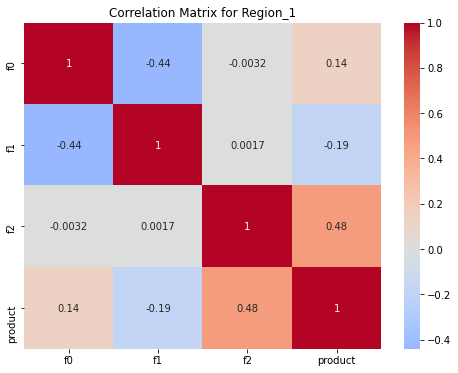

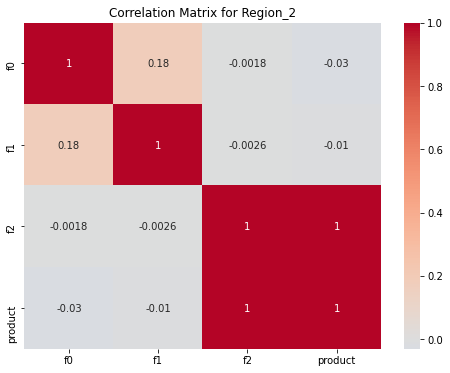

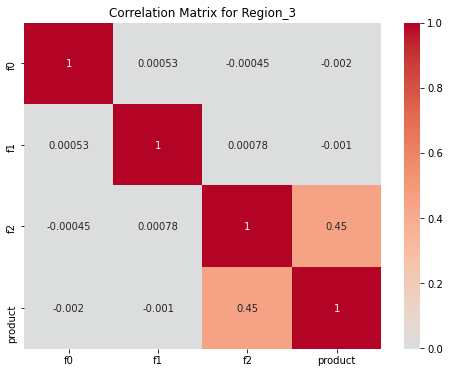

In [7]:
# Посмтроим матрицу корреляций для каждого датафрейма
for region_name, df in regions.items():
    plot_correlation_matrix(df, region_name)

**Вывод:**

Данные геологоразведки трёх регионов находятся в файлах:     
/datasets/geo_data_0.csv    
/datasets/geo_data_1.csv  
/datasets/geo_data_2.csv  

**id** — уникальный идентификатор скважины  
**f0, f1, f2** — три признака точек  
**product** — объём запасов в скважине (тыс. баррелей).     

Все три датасета имеют одинаковый размер, пропуски и дубликаты в данных отсутствуют.

**df_0 DataFrame** показывает значимую корреляцию между признаками `f2` и целевой переменной `product` (0.48), что может быть полезно для модели.  
**df_1 DataFrame** имеет низкую корреляцию между признаками и целевой переменной, что может осложнить задачу предсказания объема запасов.  
**df_2 DataFrame** также показывает значимую корреляцию между признаком `f2` и целевой переменной `product` (0.45), что делает этот признак важным для модели.  

## Обучим и проверим модель для каждого региона

### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
### Обучим модель и сделаем предсказания на валидационной выборке.
### Сохраним предсказания и правильные ответы на валидационной выборке.
### Напечатаем на экране средний запас предсказанного сырья и RMSE модели.

In [8]:
def train_evaluate(df, df_name):
    # 2.1 Разделение данных на обучающую и валидационную выборки
    features = df.drop(columns=['product', 'id'])
    target = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    
    # 2.2 Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 2.3 Предсказания на валидационной выборке
    predictions = model.predict(X_valid)
    
    # 2.4 Печать среднего запаса предсказанного сырья и RMSE модели
    mean_predicted = np.mean(predictions)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    
    print(f"Регион: {df_name}")
    print(f"Размер обучающей выборки: {X_train.shape[0]} ({X_train.shape[0] / df.shape[0] * 100:.2f}%)")
    print(f"Размер валидационной выборки: {X_valid.shape[0]} ({X_valid.shape[0] / df.shape[0] * 100:.2f}%)")
    print(f"Средний запас предсказанного сырья: {mean_predicted:.2f} тыс. баррелей")
    print(f"RMSE модели: {rmse:.2f}")
    print("\n" + "="*50 + "\n")
    
    return y_valid, pd.Series(predictions, index=y_valid.index)

In [9]:
# Применим функцию к каждому датафрему
results = {}
for region_name, df in regions.items():
    results[region_name] = train_evaluate(df, region_name)

Регион: Region_1
Размер обучающей выборки: 75000 (75.00%)
Размер валидационной выборки: 25000 (25.00%)
Средний запас предсказанного сырья: 92.59 тыс. баррелей
RMSE модели: 37.58


Регион: Region_2
Размер обучающей выборки: 75000 (75.00%)
Размер валидационной выборки: 25000 (25.00%)
Средний запас предсказанного сырья: 68.73 тыс. баррелей
RMSE модели: 0.89


Регион: Region_3
Размер обучающей выборки: 75000 (75.00%)
Размер валидационной выборки: 25000 (25.00%)
Средний запас предсказанного сырья: 94.97 тыс. баррелей
RMSE модели: 40.03




**Вывод:**

- Модель для второго региона демонстрирует наименьшую среднеквадратичную ошибку, что свидетельствует о хорошем качестве предсказаний.
- Модели для первого и третьего регионов имеют более высокие значения RMSE, что может указывать на более значительный разброс между фактическими и предсказанными данными.
- Средние запасы предсказанного сырья сравнительно близки во всех трёх регионах, но второй регион имеет наименьшее среднее предсказанное значение.

## Расчёт прибыли

### Сохранение всех ключевых значений в отдельных переменных

In [10]:
# Ключевые значения для расчётов
BUDGET = 10_000_000_000  # бюджет на разработку в рублях
REVENUE_PER_THOUSAND_BARREL = 450_000  # доход с каждой тысячи баррелей в рублях
NUM_POINTS = 500  # количество точек для разведки
BEST_POINTS = 200  # количество лучших точек для разработки
SAMPLES_NUMBER = 1000

### Расчёт достаточного объёма сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе

In [11]:
# Расчёт достаточного объёма сырья для безубыточной разработки новой скважины
total_cost_per_point = BUDGET / BEST_POINTS
break_even_volume = total_cost_per_point / REVENUE_PER_THOUSAND_BARREL

print(f"Достаточный объём сырья для безубыточной разработки новой скважины: {break_even_volume:.2f} тыс. баррелей")

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


In [12]:
# Функция для расчета среднего запаса и дефицита сырья в регионе
def calculate_mean_and_deficit(df, region_name, break_even_volume):
    mean_volume = df['product'].mean()
    deficit = break_even_volume - mean_volume
    deficit_info = f"{deficit:.2f} тыс. баррелей не хватает" if deficit > 0 else "достаточно сырья"
    
    print(f'Средний запас сырья в {region_name}: {mean_volume:.2f} тыс. баррелей')
    print()
    print(f"{region_name}: {deficit_info}")
    print("="*50)

In [13]:
# Вычисления для каждого региона
print("\nСравнение с достаточным объёмом сырья для безубыточной разработки:")
for region_name, df in regions.items():
    calculate_mean_and_deficit(df, region_name, break_even_volume)


Сравнение с достаточным объёмом сырья для безубыточной разработки:
Средний запас сырья в Region_1: 92.50 тыс. баррелей

Region_1: 18.61 тыс. баррелей не хватает
Средний запас сырья в Region_2: 68.83 тыс. баррелей

Region_2: 42.29 тыс. баррелей не хватает
Средний запас сырья в Region_3: 95.00 тыс. баррелей

Region_3: 16.11 тыс. баррелей не хватает


**Вывод:**

Полученные данные указывают на то, что средние объемы запасов сырья в каждом из регионов недостаточны для обеспечения даже окупаемости затрат на разработку.

## Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [14]:
def revenue(target, predictions, best_points):
    """
    Рассчитывает прибыль по выбранным скважинам на основе предсказаний модели.

    :param target: Series реальных значений объема сырья
    :param predictions: Series предсказанных значений объема сырья
    :param best_points: количество скважин для разработки
    :revenue_per_thousand_barrel: доход с каждой тысячи баррелей в рублях
    :param budget: бюджет на разработку в рублях
    :return: прибыль
    """
    preds_sorted = predictions.sort_values(ascending=False)
    selected = target[preds_sorted.index][:best_points]
    return REVENUE_PER_THOUSAND_BARREL * selected.sum() - BUDGET

In [15]:
# Проверка работы функции
for region_name, (target, predictions) in results.items():
    profit = revenue(target, predictions, BEST_POINTS)
    print(f"Прибыль для {region_name}: {profit:.2f} рублей")

Прибыль для Region_1: 3320826043.14 рублей
Прибыль для Region_2: 2415086696.68 рублей
Прибыль для Region_3: 2710349963.60 рублей


**Вывод:**

Функция **revenue** оценивает финансовую эффективность разработки выбранных скважин на основе предсказанных объемов добычи. Она использует сортировку предсказанных значений, чтобы выбрать наилучшие скважины и рассчитать прибыль, вычитая из общего дохода бюджет на разработку.

In [16]:
# Применим технику Bootstrap для оценки прибыли и рисков
state = np.random.RandomState(RANDOM_STATE)

for region_name, (target, predictions) in results.items():
    values = []
    for i in range(SAMPLES_NUMBER):
        # Генерация бутстреп-выборки
        target_subsample = target.sample(n=NUM_POINTS, replace=True, random_state=state)
        predictions_subsample = predictions.loc[target_subsample.index]
        # Расчет прибыли для бутстреп-выборки
        profit = revenue(target_subsample.reset_index(drop=True), predictions_subsample.reset_index(drop=True), BEST_POINTS)
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    mean = values.mean()
    loss_probability = sum(values < 0) / values.count() * 100
    
    # Вывод результатов
    print(f"Регион: {region_name}")
    print(f"Средняя возможная прибыль: {mean:.2f} рублей")
    print(f"95%-доверительный интервал: от {lower:.2f} до {upper:.2f} рублей")
    print(f"Вероятность убытков: {loss_probability:.2f}%")
    print("="*50)

Регион: Region_1
Средняя возможная прибыль: 396164984.80 рублей
95%-доверительный интервал: от -111215545.89 до 909766941.55 рублей
Вероятность убытков: 6.90%
Регион: Region_2
Средняя возможная прибыль: 461155817.28 рублей
95%-доверительный интервал: от 78050810.75 до 862952060.26 рублей
Вероятность убытков: 0.70%
Регион: Region_3
Средняя возможная прибыль: 392950475.17 рублей
95%-доверительный интервал: от -112227625.38 до 934562914.55 рублей
Вероятность убытков: 6.50%


## Общий вывод

Для выполнения данной задачи были обработаны данные о месторождениях из трёх регионов, каждый из которых содержал 10 000 месторождений. На основе этих данных была построена модель линейной регрессии для прогнозирования объёма запасов сырья в скважинах каждого региона. Результаты показали, что наиболее точные предсказания были получены для второго региона, где средний запас сырья на скважину составил 68.73 тыс. баррелей с отклонением 0.89 тыс. баррелей. Предсказания для первого и третьего регионов оказались схожими.

Минимально необходимый объём сырья для безубыточной разработки новой скважины был определён на уровне 111.11 тыс. баррелей. Этот показатель стал ключевым в дальнейших расчетах.

Для оценки возможной прибыли и рисков была применена техника Bootstrap с 1000 выборками. Анализ распределения прибыли показал, что наиболее перспективным регионом для разработки является второй регион. Он продемонстрировал наименьшую вероятность убытков (0.70%) и наибольшую среднюю возможную прибыль (461 155 817 рублей). Эти показатели делают второй регион наилучшим выбором для дальнейших инвестиций и разработки скважин.

На основании проведенного анализа рекомендуется сосредоточить усилия на разработке месторождений второго региона, так как он обеспечивает наилучшее сочетание низкого риска и высокой прибыли.